In [1]:
import pandas as pd 

The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

In [3]:

data=pd.read_csv(r"F:\DS_end_end\notebooks\data\gemstone - Copy.csv")

In [4]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [6]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
4376,4376,2.13,Ideal,F,SI2,62.2,55.0,8.19,8.27,5.11,18578
146537,146537,0.35,Premium,I,VS1,62.5,58.0,4.47,4.50,2.81,647
148547,148547,1.00,Premium,E,SI1,62.7,60.0,6.43,6.38,4.00,5300
135145,135145,1.03,Ideal,H,SI1,61.9,56.0,6.49,6.51,4.02,5257
21915,21915,0.70,Very Good,H,VVS1,61.5,55.0,5.75,5.78,3.54,3323


In [7]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
data.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [10]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(193573, 11)

In [13]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [14]:
categorical_columns=data.columns[data.dtypes=="object"]
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [15]:
numerical_columns=data.columns[data.dtypes!="object"]
numerical_columns


Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [16]:

data[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [17]:
data[categorical_columns].describe

<bound method NDFrame.describe of               cut color clarity
0         Premium     F     VS2
1       Very Good     J     SI2
2           Ideal     G     VS1
3           Ideal     G     VS1
4         Premium     G     VS2
...           ...   ...     ...
193568      Ideal     D    VVS2
193569    Premium     G    VVS2
193570  Very Good     F     SI1
193571  Very Good     D     SI1
193572       Good     E     SI2

[193573 rows x 3 columns]>

In [18]:
data[numerical_columns]

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [19]:
data[numerical_columns].describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [20]:
data.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [21]:
#  https://www.vrai.com/journal/post/diamond-cut

In [22]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

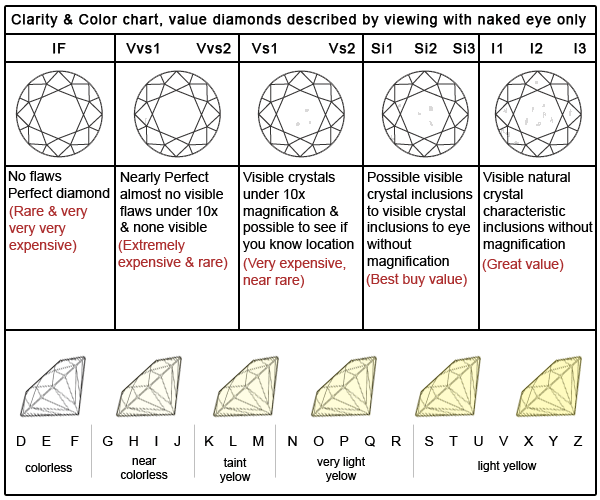

In [23]:
data[categorical_columns]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [24]:
data[categorical_columns]['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [25]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

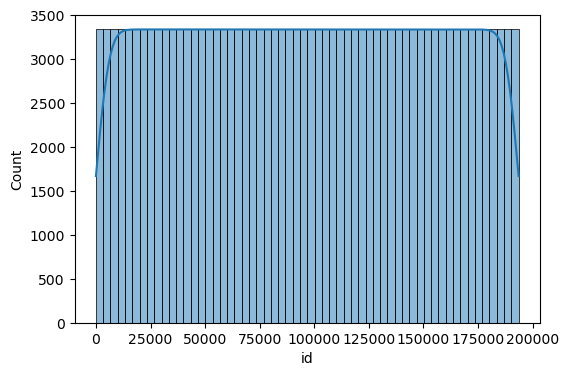

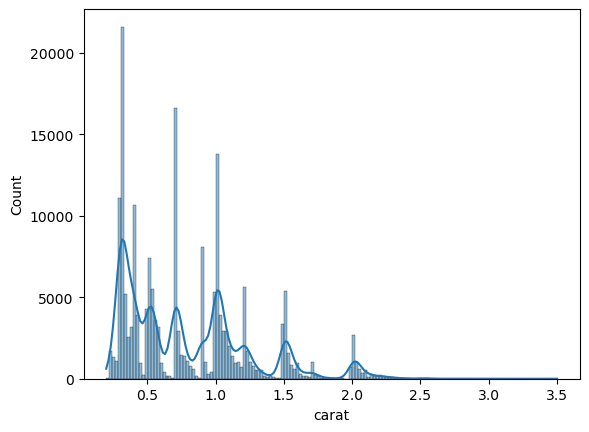

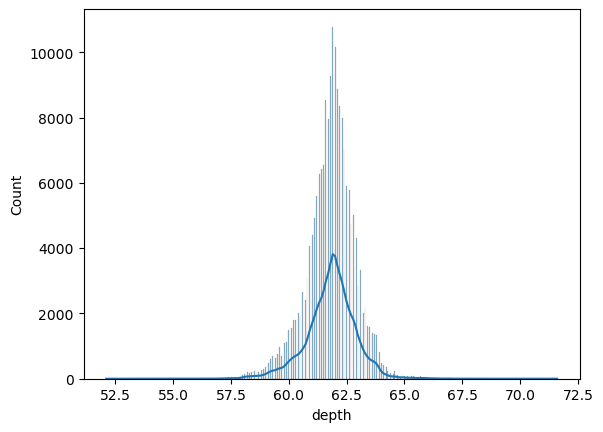

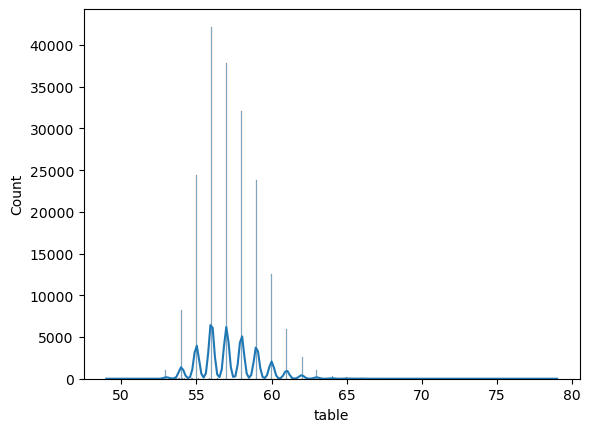

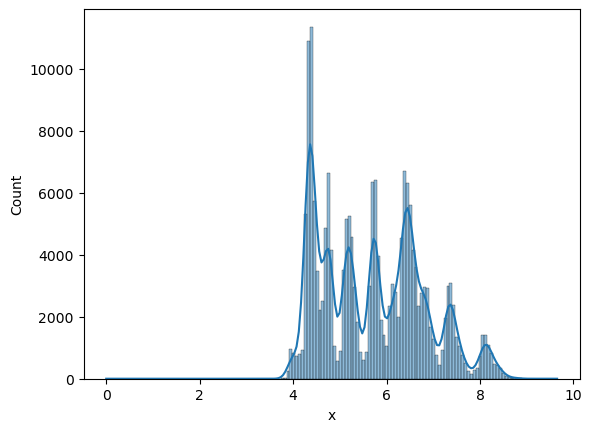

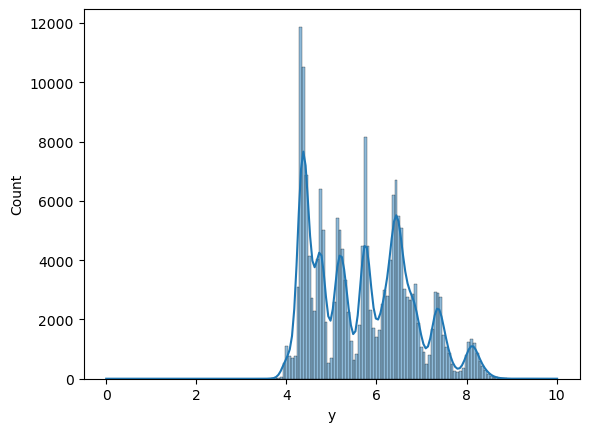

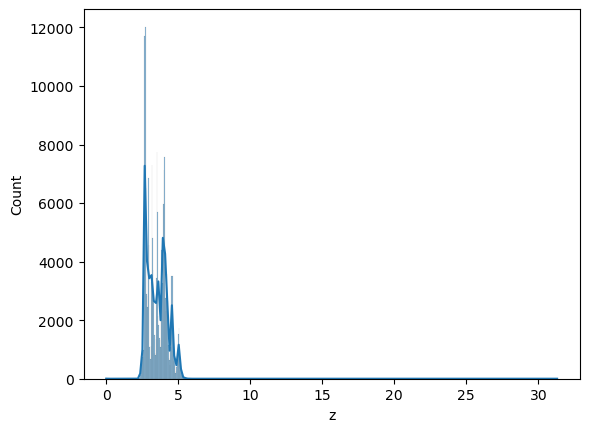

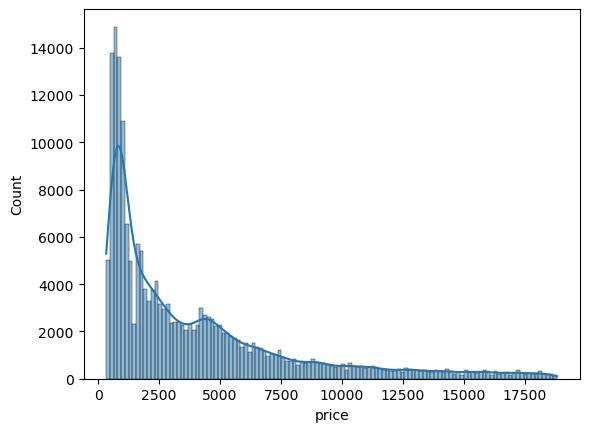

In [27]:

plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

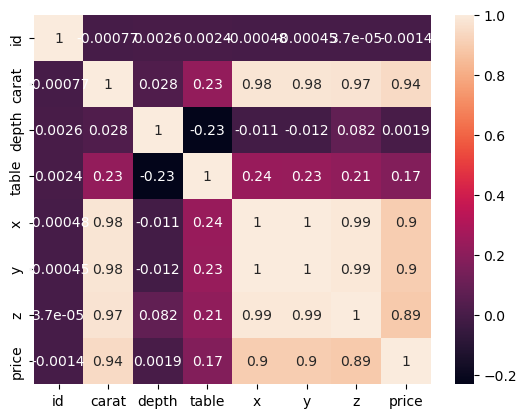

In [28]:
# categorical data
# assignment is you have to take all the categorical col and you need to plot either bar plot or count
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [29]:

data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [30]:
data.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [31]:
# encoding

data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [32]:

data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [33]:

data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [34]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [35]:
data["cut"] = data["cut"].map(cut_map)
data["clarity"] = data["clarity"].map(clarity_map)
data["color"] = data["color"].map(color_map)

In [36]:
data.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [37]:
data.drop(labels = ["id"],axis=1,inplace=True)

In [38]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
